 # FIT5196 Assessment 3 (Data integration)
#### Student Name: Mayank Bhardwaj
#### Student ID: 29325293

Date:3/10/2018

Environment: Python 3.6.4 and Jupyter notebook
Libraries used: 
* pandas
* numpy
* datetime
* monthrange
* matplotlib.pyplot
* shapefile 
* xml.etree.ElementTree
* math functions
* from matplotlib.patches import Polygon
* from matplotlib.collections import PatchCollection

## 1. Introduction
We have given the 7 dataset in the different formats of housing data information 
of victoria australia.
This has been divided into 3 task as given below:
* 1.Task 1: Data Integration
* 2.Task 2: data reshaping
* 3.Task 3: Documentation

In [1]:
import pandas as pd
import math
from math import sin, cos, sqrt, atan2,radians
from datetime import datetime
import xml.etree.ElementTree as ET
import matplotlib 
%matplotlib inline
from shapely.geometry import Point
from shapely.geometry import shape
import shapefile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import statsmodels.formula.api as smf
import numpy as np
from statsmodels.graphics.gofplots import ProbPlot
from sklearn import preprocessing
from math import pow
from math import log

## Task 1: Data Integration
In this task, you are required to integrate these 7 datasets into one with the given schema:

Read the realestate.json and realestate.xml file in the dataframe.

In [2]:
estate_df = pd.read_json('real_state.json')
estate_df.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
0,12 Villiers Street,1.0,4.0,-37.880403,145.005270,2.0,9990000.0,85242.0,house,2012.0
1,2/13 Gladys Grove,1.0,2.0,-37.791713,145.266711,2.0,3483000.0,63841.0,house,2014.0
2,74 Heads Road,2.0,4.0,-37.794760,145.207290,3.0,13580000.0,51993.0,house,2015.0
3,2/14 St James Avenue,1.0,2.0,-37.954281,145.149726,1.0,5100000.0,78786.0,house,2010.0
4,8 Arden Road,2.0,3.0,-37.585955,144.902397,1.0,2997000.0,27726.0,house,2014.0


In [3]:
estate_xml = ET.parse('real_state.xml')
estate_root = estate_xml.getroot()
list1 = []
for x, child in enumerate(estate_root):
    list_record = {}
    
    for subchild in child:
        list_record[subchild.tag] = subchild.text
    list1.append(list_record)
estate_xml_df = pd.DataFrame(list1)

In [4]:
estate_xml_df = estate_xml_df.T
estate_xml_df = estate_xml_df.reset_index()
estate_xml_df = estate_xml_df.drop('index', axis = 1)
estate_xml_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,3944000.0,2.0,0.0,2008.0,-37.79080963,144.9309692,house,12 Mulgrave Street,10001.0
1,1.0,9690000.0,2.0,1.0,2012.0,-37.796301,144.902524,house,42 Lynch Street,1019.0
2,1.0,11843000.0,2.0,1.0,2013.0,-37.796644,144.930014,house,20 Ormond Street,10236.0
3,2.0,12155000.0,3.0,2.0,2012.0,-37.792123,144.92208,house,22 Gardner Lane,10263.0
4,3.0,9030000.0,3.0,1.0,2009.0,-37.79491425,144.917038,house,239 Stockmans Way,10286.0


* Rename the column withthe suitable column name as given in the XML file.

In [5]:
estate_xml_df.columns = ['bathrooms', 'price', 'bedrooms', 'parking_space', 'year', 'lat', 'lng',
                         'property_type', 'addr_street', 'property_id']
estate_xml_df.head()

,bathrooms,price,bedrooms,parking_space,year,lat,lng,property_type,addr_street,property_id
0,1.0,3944000.0,2.0,0.0,2008.0,-37.79080963,144.9309692,house,12 Mulgrave Street,10001.0
1,1.0,9690000.0,2.0,1.0,2012.0,-37.796301,144.902524,house,42 Lynch Street,1019.0
2,1.0,11843000.0,2.0,1.0,2013.0,-37.796644,144.930014,house,20 Ormond Street,10236.0
3,2.0,12155000.0,3.0,2.0,2012.0,-37.792123,144.92208,house,22 Gardner Lane,10263.0
4,3.0,9030000.0,3.0,1.0,2009.0,-37.79491425,144.917038,house,239 Stockmans Way,10286.0


In [6]:
estate_df = estate_df[['bathrooms', 'price', 'bedrooms', 'parking_space', 'year', 'lat', 'lng',
                       'property_type', 'addr_street', 'property_id']]
estate_df.head()

,bathrooms,price,bedrooms,parking_space,year,lat,lng,property_type,addr_street,property_id
0,1.0,9990000.0,4.0,2.0,2012.0,-37.880403,145.005270,house,12 Villiers Street,85242.0
1,1.0,3483000.0,2.0,2.0,2014.0,-37.791713,145.266711,house,2/13 Gladys Grove,63841.0
2,2.0,13580000.0,4.0,3.0,2015.0,-37.794760,145.207290,house,74 Heads Road,51993.0
3,1.0,5100000.0,2.0,1.0,2010.0,-37.954281,145.149726,house,2/14 St James Avenue,78786.0
4,2.0,2997000.0,3.0,1.0,2014.0,-37.585955,144.902397,house,8 Arden Road,27726.0


* Merge the both the json and xml file in the one dataframe.

In [7]:
estate_df_final = estate_xml_df.append(estate_df)


In [8]:
# Removing the null values
estate_df_final = estate_df_final[(pd.isna(estate_df_final.property_id)==False) & (estate_df_final.property_id !='nan')]

estate_df_final[['bathrooms','bedrooms','lat','lng','parking_space','price','property_id','year']]= estate_df_final[['bathrooms','bedrooms','lat','lng','parking_space','price','property_id','year']].apply(pd.to_numeric)

# Removing the duplicate values
estate_df_final.drop_duplicates(keep='first',subset ='property_id',inplace=True)


In [9]:
estate_df_final.reset_index(drop = True, inplace = True)

In [10]:
estate_df_final.head() # final dataset after merging.

,bathrooms,price,bedrooms,parking_space,year,lat,lng,property_type,addr_street,property_id
0,1.0,3944000.0,2.0,0.0,2008.0,-37.790810,144.930969,house,12 Mulgrave Street,10001.0
1,1.0,9690000.0,2.0,1.0,2012.0,-37.796301,144.902524,house,42 Lynch Street,1019.0
2,1.0,11843000.0,2.0,1.0,2013.0,-37.796644,144.930014,house,20 Ormond Street,10236.0
3,2.0,12155000.0,3.0,2.0,2012.0,-37.792123,144.922080,house,22 Gardner Lane,10263.0
4,3.0,9030000.0,3.0,1.0,2009.0,-37.794914,144.917038,house,239 Stockmans Way,10286.0


* reading the hospital data from the html file and placing it into dataframe.

In [11]:
hospital_df = pd.read_html('hospitals.html')
hospital_df = hospital_df[0]
hospital_df.drop("Unnamed: 0", inplace = True, axis=1)
hospital_df.head()

,id,lat,lng,name
0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
2,hospital_003,-37.792230,144.889128,Western Hospital
3,hospital_004,-37.756042,145.061896,Mercy Hospital for Women
4,hospital_005,-37.760623,144.815624,Sunshine Hospital


* Now we have to find the distance from hospital to property on the basis of min distace.
* For this we have calculate the distance with help of latitude and longitude and earth
radius we are able to calculate the minimum distance.

In [12]:
count=0
for each in estate_df_final.index:
    hosp_min = ''
    dist_min = 0
    for every in hospital_df.index:    
        lat1 = radians(float(hospital_df.iloc[every]['lat']))
        lat2 = radians(float(estate_df_final.iloc[each]['lat']))
        lon1 = radians(float(hospital_df.iloc[every]['lng']))
        lon2 = radians(float(estate_df_final.iloc[each]['lng']))
        R = 6378.0


        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance = R * c * 1000
        
        if dist_min == 0:
            hosp_min = hospital_df.iloc[every]['id']
            dist_min = distance
        elif distance < dist_min:
            hosp_min = hospital_df.iloc[every]['id']
            dist_min = distance
    
    estate_df_final.at[each, 'hospital_id'] = hosp_min
    estate_df_final.at[each, 'distance_to_hospital'] = round(dist_min,3)
 

* reading the super market data from the json file and placing it into dataframe.

In [13]:
supermarket_df = pd.read_json('supermarkets.json')
supermarket_df.head()

,id,lat,lng,type
0,S_001,-37.883978,144.735287,Woolworths
1,S_002,-41.161591,147.514797,Woolworths
2,S_003,-37.984078,145.077167,Woolworths
3,S_004,-37.707023,144.938740,Woolworths
4,S_005,-37.597670,144.938413,Woolworths


* Now we have to find the distance from supermarket to property on the basis of min distance.
* For this we have calculate the distance with help of latitude and longitude and earth
radius we are able to calculate the minimum distance.

In [14]:
count=0
for each in estate_df_final.index:
    sp_min = ''
    dist_min = 0
    for every in supermarket_df.index:    
        lat1 = radians(float(supermarket_df.iloc[every]['lat']))
        lat2 = radians(float(estate_df_final.iloc[each]['lat']))
        lon1 = radians(float(supermarket_df.iloc[every]['lng']))
        lon2 = radians(float(estate_df_final.iloc[each]['lng']))
        R = 6378.0


        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance = R * c * 1000
        
        if dist_min == 0:
            sp_min = supermarket_df.iloc[every]['id']
            dist_min = distance
        elif distance < dist_min:
            sp_min = supermarket_df.iloc[every]['id']
            dist_min = distance

    
    estate_df_final.at[each, 'supermarket_id'] = sp_min
    estate_df_final.at[each, 'distance_to_supermaket'] = round(dist_min,3)
 

* reading the shopingcenters data from the xlsx file and placing it into dataframe.

In [15]:
shoppingcenter_df = pd.read_excel('shopingcenters.xlsx')
shoppingcenter_df.head()

,sc_id,lat,lng
0,SC_001,-37.767915,145.041790
1,SC_002,-37.819375,145.171472
2,SC_003,-37.971131,145.089065
3,SC_004,-35.280406,149.132550
4,SC_005,-37.574572,144.920452


* Now we have to find the distance from shopping center to property on the basis of min distace.
* For this we have calculate the distance with help of latitude and longitude and earth
radius we are able to calculate the minimum distance.

In [16]:
count=0
for each in estate_df_final.index:
    sc_min = ''
    dist_min = 0
    for every in shoppingcenter_df.index:    
        lat1 = radians(float(shoppingcenter_df.iloc[every]['lat']))
        lat2 = radians(float(estate_df_final.iloc[each]['lat']))
        lon1 = radians(float(shoppingcenter_df.iloc[every]['lng']))
        lon2 = radians(float(estate_df_final.iloc[each]['lng']))
        R = 6378.0


        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance = R * c * 1000
        
        if dist_min == 0:
            sc_min = shoppingcenter_df.iloc[every]['sc_id']
            dist_min = distance
        elif distance < dist_min:
            sc_min = shoppingcenter_df.iloc[every]['sc_id']
            dist_min = distance

    
    estate_df_final.at[each, 'shopping_center_id'] = sc_min
    estate_df_final.at[each, 'distance_to_sc'] = round(dist_min,3)
 

* We have used the shapely to find the suburb in th file.

In [17]:
sf = shapefile.Reader('VIC_LOCALITY_POLYGON_shp')
recs = sf.records()
shapes = sf.shapes()

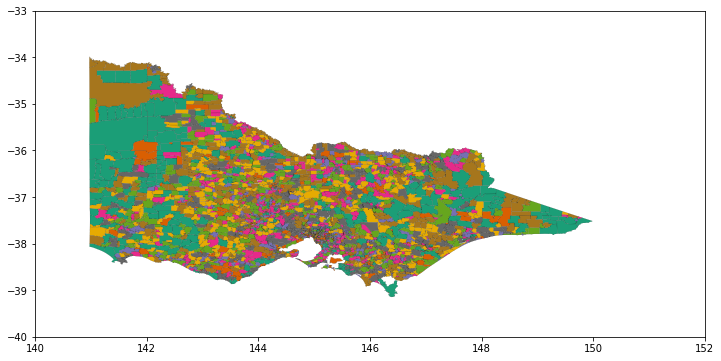

In [18]:
cm = matplotlib.cm.get_cmap('Dark2')

Nshp = len(shapes)
cccol = cm(1.*np.arange(Nshp)/Nshp)
# plotting
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)

for nshp in range(Nshp):
    ptchs   = []
    pts     = np.array(shapes[nshp].points)
    prt     = shapes[nshp].parts
    par     = list(prt) + [pts.shape[0]]
    for pij in range(len(prt)):
         ptchs.append(Polygon(pts[par[pij]:par[pij+1]]))
    ax.add_collection(PatchCollection(ptchs,facecolor=cccol[nshp,:],edgecolor='k', linewidths=.1))

ax.set_xlim(140,+152)
ax.set_ylim(-40,-33)

for each in estate_df_final.index:
    x = 0
    i = 0
    point = (float(estate_df_final.iloc[each]['lng']), float(estate_df_final.iloc[each]['lat']))
    
    while x == 0:
        if i < len(shapes):
            boundary = shape(shapes[i])
            if (boundary).contains(Point(point)):
                estate_df_final.at[each, 'suburb'] = recs[i][6]
                x = 1
            
        else:
            x = 1
        i = i + 1


* reading the stops data from the text file and placing it into dataframe.

In [19]:
trip_df=pd.read_csv('trips.txt')
stop_t_df=pd.read_csv('stop_times.txt')
calender_df=pd.read_csv('calendar.txt')
route_df=pd.read_csv('routes.txt')
train_df = pd.read_csv('stops.txt')

* Now we have merge all the files which are trips,stop times, calender,routes and stop files on the basis of key and applying the inner join. 

In [20]:

all_train_data_df = calender_df.merge(trip_df,how ='inner',on=['service_id'])

all_train_data_df = all_train_data_df.merge(stop_t_df,how ='inner',on=['trip_id'])

all_train_data_df = all_train_data_df.merge(route_df,how ='inner',on=['route_id'])

all_train_data_df = all_train_data_df.merge(train_df,how ='inner',on=['stop_id'])
all_train_data_df.shape


(390305, 31)

In [21]:
# selecting all T0 weekdays id only.
all_train_data_df = all_train_data_df[all_train_data_df.trip_id.str.contains("T0")]

* Direct transfer calculation is given below

In [22]:
train_stop_transfer_df = pd.DataFrame(columns = ['stop_id','flag','time'])
list_of_stops=[]
list_of_stops=train_df['stop_id'].tolist()

inter_1=all_train_data_df[(all_train_data_df['stop_id']== 19854) & (all_train_data_df['trip_headsign']=='City (Flinders Street)')]
inter_2=all_train_data_df[(all_train_data_df['stop_id']!=19854) & (all_train_data_df['departure_time']>='07:00:00')& 
                          (all_train_data_df['departure_time']<='09:00:00')& 
                          (all_train_data_df['trip_headsign']=='City (Flinders Street)')]

inter_1=inter_1[['trip_id','arrival_time','departure_time','stop_id']]
inter_2=inter_2[['trip_id','arrival_time','departure_time','stop_id']]

inter_1_2_merge=inter_1.merge(inter_2, on=['trip_id'],
                            how = 'inner')

inter_1_2_merge['arr_dep']=pd.to_datetime(inter_1_2_merge['arrival_time_x'])-pd.to_datetime(inter_1_2_merge['departure_time_y'])
inter_1_2_merge['arr_dep_sec']=inter_1_2_merge['arr_dep'].dt.total_seconds()/60

for every in list_of_stops:
    if every != 19854:                                 
        length=len(train_stop_transfer_df)
        train_stop_transfer_df.at[length,'stop_id']= every
        train_stop_transfer_df.at[length,'flag']= 0
        train_stop_transfer_df.at[length,'time']= round(inter_1_2_merge.loc[inter_1_2_merge['stop_id_y']==every]['arr_dep_sec'].mean(),3)
        
length=len(train_stop_transfer_df)
train_stop_transfer_df.at[length,'stop_id'] = 19854
train_stop_transfer_df.at[length,'flag'] = 0
train_stop_transfer_df.at[length,'time'] = 0

* We have seprated the na stop and put it in list

In [23]:
stop_na_list=[]
for each in train_stop_transfer_df.index:
    if pd.isna(train_stop_transfer_df.loc[each]['time']):
        stop_na_list.append(train_stop_transfer_df.loc[each]['stop_id'])
print(stop_na_list)               

[19827, 19828, 19829, 19830, 19831, 19832, 19833, 19834, 19836, 20027, 20028]


* Now we have calculated for the indirect transfer in the below section.

In [24]:
for stop in stop_na_list:
    time = 0
    count =0 
    for j in all_train_data_df[(all_train_data_df.stop_id == stop) & (all_train_data_df['departure_time']>='07:00:00') &\
                      (all_train_data_df['departure_time']<='09:00:00') & (all_train_data_df.direction_id == 0)].index:
        
        trip_stop = all_train_data_df.loc[j]['trip_id']
        list_stop = all_train_data_df[(all_train_data_df['trip_id']==trip_stop)]['stop_id'].tolist()
        list_stop = list(set(list_stop))
        
        for y in list_stop:
            for idx in all_train_data_df.loc[all_train_data_df['stop_id']==y].index:
                if all_train_data_df.loc[idx]['trip_headsign'] == 'City (Flinders Street)':

                    direct = all_train_data_df.loc[idx]['stop_id']
                    time = train_stop_transfer_df.loc[train_stop_transfer_df['stop_id']==direct]['time'].item()
                        
                    arr_time = all_train_data_df.loc[(all_train_data_df['trip_id']==trip_stop) &(all_train_data_df['stop_id']==direct)]['arrival_time'].item()
                    
                    difference = pd.to_datetime(arr_time)-pd.to_datetime(all_train_data_df.loc[j]['departure_time'])
                    difference = difference.total_seconds()/60
                    
                    time+=difference
          
    if time != 0: 
        i = train_stop_transfer_df.loc[train_stop_transfer_df.stop_id == stop].index
        train_stop_transfer_df.at[i, 'time'] =round(time,3)
        train_stop_transfer_df.at[i, 'flag'] = 1     

                            

In [25]:
train_stop_transfer_df = train_stop_transfer_df[pd.isna(train_stop_transfer_df.time)==False]

In [26]:
train_df = train_df.merge(train_stop_transfer_df, on = ['stop_id'], how = 'inner')

* Now we have to find the distance from train station to property on the basis of min distace.
* For this we have calculate the distance with help of latitude and longitude and earth
radius we are able to calculate the minimum distance.

In [27]:
count=0
for each in estate_df_final.index:
    stop_min = ''
    dist_min = 0
    for every in train_df.index:    
        lat1 = radians(float(train_df.iloc[every]['stop_lat']))
        lat2 = radians(float(estate_df_final.iloc[each]['lat']))
        lon1 = radians(float(train_df.iloc[every]['stop_lon']))
        lon2 = radians(float(estate_df_final.iloc[each]['lng']))
        R = 6378.0


        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance = R * c * 1000
        
        if dist_min == 0:
            stop_min = train_df.iloc[every]['stop_id']
            dist_min = distance
        elif distance < dist_min:
            stop_min = train_df.iloc[every]['stop_id']
            dist_min = distance

    
    estate_df_final.at[each, 'train_station_id'] = stop_min
    estate_df_final.at[each, 'distance_to_train_station'] = round(dist_min,0)
    estate_df_final.at[each, 'transfer_flag'] = train_df.loc[train_df.stop_id == stop_min]['flag'].item()
    estate_df_final.at[each, 'travel_min_to_CBD'] = train_df.loc[train_df.stop_id == stop_min]['time'].item() 

In [28]:
estate_df_final = estate_df_final[['property_id', 'lat', 'lng', 'addr_street', 'suburb', 'price', 'property_type', 
                                   'year','bedrooms', 'bathrooms','parking_space', 'shopping_center_id', 
                                   'distance_to_sc', 'train_station_id', 'distance_to_train_station','travel_min_to_CBD',
                                   'transfer_flag', 'hospital_id', 'distance_to_hospital', 'supermarket_id',
                                   'distance_to_supermaket' ]]

In [29]:
estate_df_final.to_csv('29325293_solution.csv')

## Task 2: data reshaping
In this, we are going to study the different effects of standardization, minmax normalization, log, power and sqrt transformation) on the price attribute and observe and will explain their effect on the price distribution.

* Now we are going to see the effects of different noramlization/transformation methods:
    * standardization 
    * minmax normalization
    * log 
    * power
    * sqrt transformation
* There are many reasons to do the data transformation which are mentioned below:
    * Firstly Visualization of data increases ability to understand data.
    * Improve the compatibility of data with assumptions underlying a modelling
      process.
    * we have to fix the skew in the data.
    * Better interpretability
    
* Basically we have to change the attributes in such a way so that the new attributes increases the power of prediction of the model. And also helps in enhancing the linearity, visual aid and statistical power of the model

* There are two types of data normalisation:
    * Standardisation (z-score normalisation):
    * Scaling by
        * Min-Max normalisation
        * Decimal scaling

### Given value of the price attribute

* In below section we are going to see the histogram of price for bins 50 and check where is data skewed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F6C3C0DD8>]],
      dtype=object)

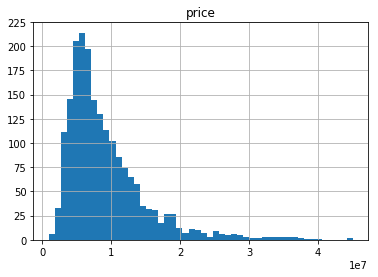

In [30]:
estate_df_final.hist('price', bins = 50)

* In this we can see that data is right skewed now fill check and fit in linear model.

* Below is the linear model that we are going to make on the basis of number of bedroom, bathrooms, parking space and property type. After this when we have checked the value of skew is 1.815 and kurtosis is 7.999 note it down.

In [31]:
model = smf.ols(formula='price ~ bedrooms + bathrooms + parking_space + property_type', data=estate_df_final)
estate_model = model.fit()
estate_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     55.30
Date:                Fri, 26 Oct 2018   Prob (F-statistic):           2.61e-34
Time:                        23:51:28   Log-Likelihood:                -33361.
No. Observations:                1965   AIC:                         6.673e+04
Df Residuals:                    1961   BIC:                         6.675e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.404e+06   5.59e+05      6.093      0.000    2.31e+06     4.5e+06
bedrooms       9.131e+05   2.05e+05      4.450      0.000    5.11e+05    1.32e+06
bathrooms      1.869e+06   2.58e+05      7.233      0.000    1.36e+06    2.38e+06
parking_space -3.452e+04   1.79e+05     -0.193      0.847   -3.85e+05    3.16e+05
==============================================================================
Omnibus:                      746.401   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3124.302
Skew:                           1.815   Prob(JB):                         0.00
Kurtosis:                       7.999   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Normalization of the price attribute

* Now we have applied the min max scaler to the data and scale the variable whose values are in a specific range. And created the histogram to check the skewness of data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F677F71D0>]],
      dtype=object)

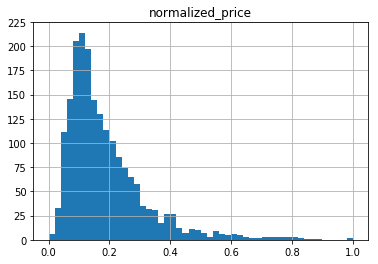

In [32]:
scale= preprocessing.MinMaxScaler().fit(estate_df_final[['price']])
estate_df_final['normalized_price'] = scale.transform(estate_df_final[['price']])
estate_df_final.hist(column= 'normalized_price', bins = 50)


* In this we can see that data is right skewed now fill check and fit in linear model.

* Below is the linear model that we are going to make on the basis of number of bedroom, bathrooms, parking space and property type. After this when we have checked the value of skew is 1.815 and kurtosis 7.999 note it down. After checking skew and kurtosis value we have seen that this is not better and values are same. 

In [33]:
model = smf.ols(formula='normalized_price ~ bedrooms + bathrooms + parking_space + property_type', data=estate_df_final)
estate_model_minmax = model.fit()
estate_model_minmax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       normalized_price   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     55.30
Date:                Fri, 26 Oct 2018   Prob (F-statistic):           2.61e-34
Time:                        23:51:28   Log-Likelihood:                 1227.5
No. Observations:                1965   AIC:                            -2447.
Df Residuals:                    1961   BIC:                            -2425.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0560      0.013      4.425      0.000       0.031       0.081
bedrooms          0.0207      0.005      4.450      0.000       0.012       0.030
bathrooms         0.0424      0.006      7.233      0.000       0.031       0.054
parking_space    -0.0008      0.004     -0.193      0.847      -0.009       0.007
==============================================================================
Omnibus:                      746.401   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3124.302
Skew:                           1.815   Prob(JB):                         0.00
Kurtosis:                       7.999   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Standardization of the price attribute

* Now we are going to apply z-score normalisation where we do the shifting the distribution of data of mean and standard deviation as 0 and 1 respectively.
* In below section we are going to see the histogram of standardized price for bins 50 and check where is data skewed.
* In this we can see that data is right skewed now fill check and fit in linear model.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F00CC4DD8>]],
      dtype=object)

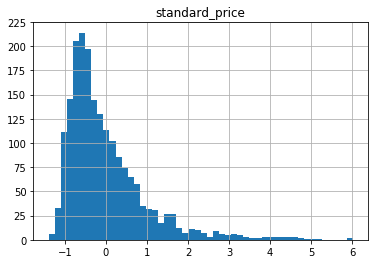

In [34]:
scale= preprocessing.StandardScaler().fit(estate_df_final[['price']])
estate_df_final['standard_price'] = scale.transform(estate_df_final[['price']])
estate_df_final.hist(column= 'standard_price', bins = 50)

* Below is the linear model that we are going to make on the basis of number of bedroom, bathrooms, parking space and property type. After this when we have checked the value of skew is 1.815 and kurtosis 7.999 note it down. After checking skew and kurtosis value we have seen that this is not better and values are same. So, nothing can be concluded. 

In [35]:
model = smf.ols(formula='standard_price ~ bedrooms + bathrooms + parking_space + property_type', data=estate_df_final)
estate_model_standard = model.fit()
estate_model_standard.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         standard_price   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     55.30
Date:                Fri, 26 Oct 2018   Prob (F-statistic):           2.61e-34
Time:                        23:51:29   Log-Likelihood:                -2708.4
No. Observations:                1965   AIC:                             5425.
Df Residuals:                    1961   BIC:                             5447.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.9810      0.094    -10.453      0.000      -1.165      -0.797
bedrooms          0.1534      0.034      4.450      0.000       0.086       0.221
bathrooms         0.3141      0.043      7.233      0.000       0.229       0.399
parking_space    -0.0058      0.030     -0.193      0.847      -0.065       0.053
==============================================================================
Omnibus:                      746.401   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3124.302
Skew:                           1.815   Prob(JB):                         0.00
Kurtosis:                       7.999   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Log transformation of price attribute

* In below section we are going to see the histogram of log value of price for bins 50 and check where is data skewed. 
* In this we can see that data is normally distributed and now fill check and fit in linear model.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F00C87F98>]],
      dtype=object)

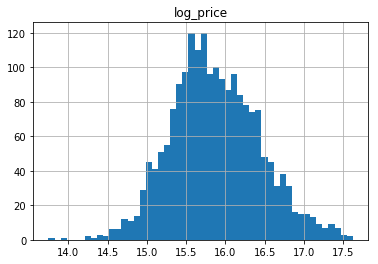

In [36]:
estate_df_final['log_price'] = estate_df_final['price'].apply(lambda x: log(float(x)))
estate_df_final.hist(column= 'log_price', bins = 50)

Below is the linear model that we are going to make on the basis of number of bedroom, bathrooms, parking space and property type. After this when we have checked the value of skew is 0.083 and kurtosis 2.974 note it down. After checking skew and kurtosis value we have seen that this is much better than the previous transformations. So, we can conclude that this model is better than the above models.

In [37]:
model = smf.ols(formula='log_price ~ bedrooms + bathrooms + parking_space + property_type', data=estate_df_final)
estate_model_log = model.fit()
estate_model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     44.52
Date:                Fri, 26 Oct 2018   Prob (F-statistic):           7.93e-28
Time:                        23:51:29   Log-Likelihood:                -1600.5
No. Observations:                1965   AIC:                             3209.
Df Residuals:                    1961   BIC:                             3231.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        15.3706      0.053    287.825      0.000      15.266      15.475
bedrooms          0.0762      0.020      3.884      0.000       0.038       0.115
bathrooms         0.1598      0.025      6.469      0.000       0.111       0.208
parking_space     0.0035      0.017      0.202      0.840      -0.030       0.037
==============================================================================
Omnibus:                        2.291   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                2.312
Skew:                           0.083   Prob(JB):                        0.315
Kurtosis:                       2.974   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Squared price

* In below section we are going to see the histogram of square value of price for bins 50 and check where is data skewed. 
* In this we can see that data is right skewed now fill check and fit in linear model.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F00EAE710>]],
      dtype=object)

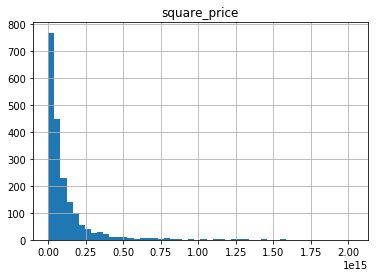

In [38]:
estate_df_final["square_price"] = estate_df_final['price'].apply(lambda x: pow(float(x), 2))
estate_df_final.hist(column= "square_price", bins = 50)

* Below is the linear model that we are going to make on the basis of number of bedroom, bathrooms, parking space and property type. After this when we have checked the value of skew is 4.149 and kurtosis 27.347 note it down. After checking skew and kurtosis value we have seen that this is not better and values are very high. So, we can say that this model is very bad and hence can not be used. 

In [39]:
model = smf.ols(formula='square_price ~ bedrooms + bathrooms + parking_space + property_type', data=estate_df_final)
estate_model_square = model.fit()
estate_model_square.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           square_price   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     47.82
Date:                Fri, 26 Oct 2018   Prob (F-statistic):           7.99e-30
Time:                        23:51:30   Log-Likelihood:                -67361.
No. Observations:                1965   AIC:                         1.347e+05
Df Residuals:                    1961   BIC:                         1.348e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.635e+13   1.83e+13     -3.085      0.002   -9.22e+13   -2.05e+13
bedrooms       2.776e+13   6.71e+12      4.138      0.000    1.46e+13    4.09e+13
bathrooms      5.701e+13   8.45e+12      6.745      0.000    4.04e+13    7.36e+13
parking_space -1.426e+12   5.85e+12     -0.244      0.807   -1.29e+13       1e+13
==============================================================================
Omnibus:                     1735.244   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54172.674
Skew:                           4.149   Prob(JB):                         0.00
Kurtosis:                      27.347   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Square root of the price attribute

* In below section we are going to see the histogram of sqaure root of price for bins 50 and check where is data skewed.
* In this we can see that data is little right skewed now fill check and fit in linear model.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F00FB3588>]],
      dtype=object)

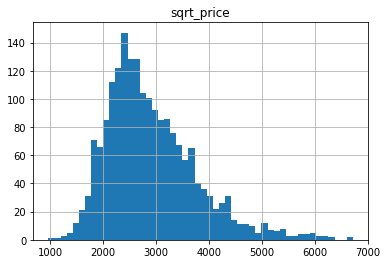

In [40]:
estate_df_final["sqrt_price"] = estate_df_final['price'].apply(lambda x: pow(float(x), 0.5))
estate_df_final.hist(column= "sqrt_price", bins = 50)

* Below is the linear model that we are going to make on the basis of number of bedroom, bathrooms, parking space and property type. After this when we have checked the value of skew is 0.889 and kurtosis 4.142 note it down. After checking skew and kurtosis value we have seen that this is not better and values are higher than the log model. So, we can say that this model is not good and hence can not be used.

In [41]:
model = smf.ols(formula='sqrt_price ~ bedrooms + bathrooms + parking_space + property_type', data=estate_df_final)
estate_model_square_root = model.fit()
estate_model_square_root.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sqrt_price   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     52.11
Date:                Fri, 26 Oct 2018   Prob (F-statistic):           2.10e-32
Time:                        23:51:30   Log-Likelihood:                -16001.
No. Observations:                1965   AIC:                         3.201e+04
Df Residuals:                    1961   BIC:                         3.203e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2087.9196     81.328     25.673      0.000    1928.422    2247.417
bedrooms        127.9615     29.874      4.283      0.000      69.374     186.549
bathrooms       263.7809     37.627      7.010      0.000     189.988     337.573
parking_space    -1.1728     26.034     -0.045      0.964     -52.231      49.885
==============================================================================
Omnibus:                      243.346   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              365.339
Skew:                           0.889   Prob(JB):                     4.65e-80
Kurtosis:                       4.142   Cond. No.                         18.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion

From the above models, we can conclude that the log model is a good transformation to reshape the data to reduce skewness and acheive better prediction model.
Better visualization of the residual plot can be seen from the below for both the models [1]:

* Log Residual plot

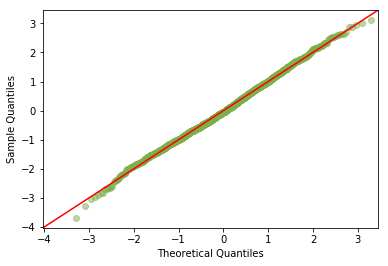

In [42]:
# this code has been reffered from the https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

y_mod=estate_model_log.fittedvalues
res_mod=estate_model_log.resid 
res_norm=estate_model_log.get_influence().resid_studentized_internal
res_sqr=np.sqrt(np.abs(res_norm))
res_abs=np.abs(res_mod)
inf_mod=estate_model_log.get_influence().hat_matrix_diag
QQ = ProbPlot(res_norm)
ploting_qq=QQ.qqplot(line='45',alpha=0.5,color='#7cb04b',lw=1)

* Original price model

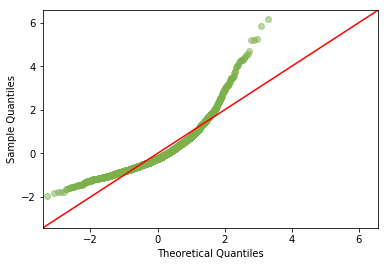

In [43]:
# this code has been reffered from the https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

y_mod=estate_model.fittedvalues
res_mod=estate_model.resid 
res_norm=estate_model.get_influence().resid_studentized_internal
res_sqr=np.sqrt(np.abs(res_norm))
res_abs=np.abs(res_mod)
inf_mod=estate_model.get_influence().hat_matrix_diag
qq=ProbPlot(res_norm)
ploting_qq=qq.qqplot(line='45',alpha=0.5,color='#7cb04b',lw=1)

## References

*  1 https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034
*  2 https://gis.stackexchange.com/questions/250172/finding-out-if-coordinate-is-within-shapefile-shp-using-pyshp
*  3 https://data.library.virginia.edu/diagnostic-plots/